In [1]:
import tensorflow as tf
import tensorflow_addons
import matplotlib.pyplot as plt
from utils import load_dataset, prepare_data

2023-06-12 22:43:23.035068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/ayoushsrivastava/opt/anaconda3/envs/fyp/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
import tensorflow as tf

def calculate_metrics(tensor1, tensor2, max_val=1.0):
    """
    Compute the SSIM and PSNR between two tensors.

    Parameters:
    tensor1: First tensor
    tensor2: Second tensor
    max_val: The dynamic range of the images (i.e., the difference between the maximum and the minimum allowed values)

    Returns:
    SSIM, PSNR: SSIM and PSNR between the two tensors
    """

    # Compute SSIM over all channels
    ssim = tf.image.ssim(tensor1, tensor2, max_val=max_val)

    # Compute PSNR over all channels
    psnr = tf.image.psnr(tensor1, tensor2, max_val=max_val)

    return ssim, psnr

In [40]:
# Load test dataset
train_ds, test_ds = load_dataset()
test_ds[0] = test_ds[0].shuffle(343, seed=1)
test_ds[1] = test_ds[1].shuffle(343, seed=1)

In [43]:
from metrics import shannon_entropy

In [45]:
for i in test_ds[1]:
    print(shannon_entropy(tf.squeeze(i)[:,:,0]))

0.7940385368489338
0.7981398527417952
0.755721980822955
0.7705083041565393
0.80494268086047
0.8027894783143916
0.7812051461774786
0.7601795835981289
0.7506114144140668
0.7995714524626947
0.796145857592548
0.7549035893584253
0.750097529624268
0.8011468369336829
0.7538853417859581
0.8046087178982537
0.818571444555925
0.8099864872178065
0.7704431006972203
0.7666224671575923
0.779114472568868
0.7932737288073144
0.7714838364743823
0.7642015201375325
0.8070821716474192
0.7993207246512517
0.8172907156825366
0.7857166140840497
0.8027149847835985
0.7752003800187832
0.7588391273222996
0.7984165895835509
0.7726363821553368
0.7596957959474547
0.8084764961346418
0.8039912406148962
0.8030505037758515
0.815957579981893
0.7667869850415663
0.8089887190739014
0.7759500239691707
0.7556585209580255
0.7813140695436833
0.7855077267948284
0.7749054682987164
0.7904037324379409
0.8107214044683375
0.7790928635569325
0.7749244604078839
0.8126485228360472
0.8091592836975324
0.7837822786975985
0.8182166222117475
0

In [41]:
import os

codes = ['T1', 'T2', 'T1GD', 'FLAIR']
example_input, example_target = next(iter(test_ds[0].take(1))), next(iter(test_ds[1].take(1)))
# os.mkdir('structMR')

for i, code in zip(range(0,4), codes):  
    plt.imsave(f'structMR/{code + str(config)}.png', tf.squeeze(tf.image.flip_up_down(example_input))[:,:,i]*0.5+0.5, cmap='gray')
    
plt.imsave(f'structMR/FA.png', tf.squeeze(tf.image.flip_up_down(example_target))[:,:,0]*0.5+0.5, cmap='gray')

In [4]:
config1 = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/all/06042023_10:58:02/gen.h5')
config2 = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/all/06042023_12:52:44/gen.h5')
config8 = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/cycleGAN/all/06042023_08:22:34/gen_g.h5')

[[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.83631355], dtype=float32)>,
  <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.512976], dtype=float32)>],
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8469688], dtype=float32)>,
  <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.383947], dtype=float32)>],
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8284264], dtype=float32)>,
  <tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.10328], dtype=float32)>]]

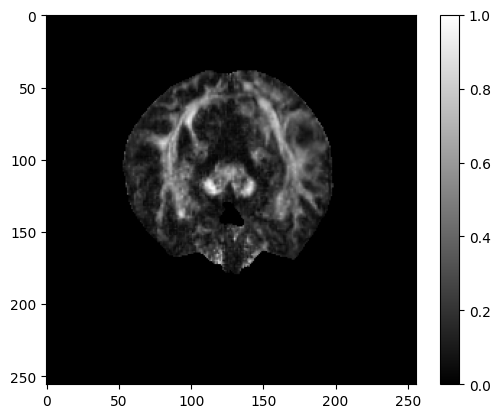

In [42]:
import os
import cv2

vmin = 0
vmax = 1

code = 'all'
configs = [1, 2, 8]
gens = [config1, config2, config8]
config_metrics = []

example_input, example_target = next(iter(test_ds[0].take(2))), next(iter(test_ds[1].take(2)))

# Take example input and target image
for config, gen in zip(configs, gens):
    if config != 8:
        processed_input, processed_target = prepare_data(code, example_input, example_target)
        processed_target = tf.image.flip_up_down(processed_target)
        generated = tf.image.flip_up_down(gen(processed_input))
        ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
        config_metrics.append([ssim, psnr])
        # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
        plt.imsave(f'architecture_comp/{code + str(config)}.png', tf.squeeze(generated*0.5+0.5), cmap='gray')
    else:
        generated = tf.image.flip_up_down(gen(example_input))
        example_target = tf.image.flip_up_down(example_target)
        ssim, psnr = calculate_metrics(tf.expand_dims(example_target[:,:,:,0], axis=3)*0.5+0.5, tf.expand_dims(generated[:,:,:,0], axis=3)*0.5+0.5)
        config_metrics.append([ssim, psnr])
        # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
        plt.imsave(f'architecture_comp/{code + str(config)}.png', tf.squeeze(generated)[:,:,0]*0.5+0.5, cmap='gray')
        processed_target = tf.image.flip_up_down(processed_target)
    
plt.imshow(tf.squeeze(processed_target*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.savefig(f'architecture_comp/real_target.png')

config_metrics

In [4]:
T1_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1/06062023_01:36:10/gen.h5')
T2_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2/06062023_01:58:55/gen.h5')
T1GD_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1GD/06062023_02:20:22/gen.h5')
FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1GD/06062023_02:20:22/gen.h5')
T1_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1/06052023_20:20:11/gen.h5')
T2_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2/06052023_20:42:27/gen.h5')
T1GD_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1GD/06052023_21:04:56/gen.h5')
FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/FLAIR/06052023_21:26:42/gen.h5')

([[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8620071], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.374174], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8480775], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.456244], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8573916], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.324575], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.78480566], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([20.029387], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.87067544], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.22808], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8590127], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.227793], dty

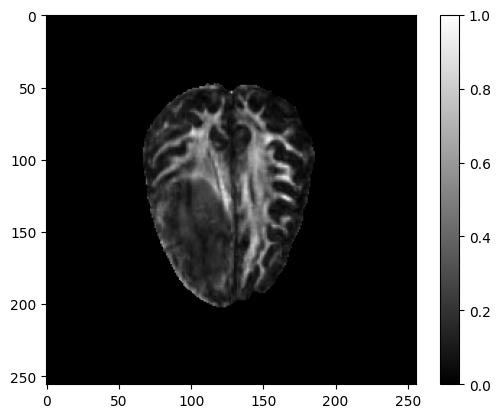

In [9]:
import os
import cv2

vmin = 0
vmax = 1

unimodal_codes = ['T1', 'T2', 'T1GD', 'FLAIR']
unimodal_gens_CL = [T1_CL, T2_CL, T1GD_CL, FLAIR_CL]
unimodal_gens_noCL = [T1_noCL, T2_noCL, T1GD_noCL, FLAIR_noCL]
unimodal_metrics_CL = []
unimodal_metrics_noCL = []

# os.mkdir('unimodal')

example_input, example_target = next(iter(test_ds[0].take(2))), next(iter(test_ds[1].take(2)))

# Take example input and target image
for code, gen in zip(unimodal_codes, unimodal_gens_CL):
    processed_input, processed_target = prepare_data(code, example_input, example_target)
    generated = gen(processed_input)
    ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
    unimodal_metrics_CL.append([ssim, psnr])
    # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave(f'unimodal/{code + "CL"}.png', tf.squeeze(generated*0.5+0.5).numpy(), cmap='gray')
    
for code, gen in zip(unimodal_codes, unimodal_gens_noCL):
    processed_input, processed_target = prepare_data(code, example_input, example_target)
    generated = gen(processed_input)
    ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
    unimodal_metrics_CL.append([ssim, psnr])
    # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave(f'unimodal/{code + "noCL"}.png', tf.squeeze(generated*0.5+0.5).numpy(), cmap='gray')
    
plt.imshow(tf.squeeze(processed_target*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.savefig(f'unimodal/real_target.png')

unimodal_metrics_CL, unimodal_metrics_noCL

In [10]:
T1_T2_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T2/06062023_03:03:32/gen.h5')
T1_T1GD_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T1GD/06062023_03:25:05/gen.h5')
T1_FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-FLAIR/06062023_03:47:07/gen.h5')
T2_T1GD_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2-T1GD/06062023_04:08:49/gen.h5')
T2_FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2-FLAIR/06062023_04:30:49/gen.h5')
T1GD_FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1GD-FLAIR/06062023_04:51:35/gen.h5')

T1_T2_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T2/06052023_21:48:53/gen.h5')
T1_T1GD_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T1GD/06052023_22:11:56/gen.h5')
T1_FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-FLAIR/06052023_22:34:11/gen.h5')
T2_T1GD_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2-T1GD/06052023_22:56:10/gen.h5')
T2_FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2-FLAIR/06052023_23:18:40/gen.h5')
T1GD_FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1GD-FLAIR/06052023_23:41:16/gen.h5')

([[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.87380004], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.297903], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.85900384], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.321695], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.86530745], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.642126], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8667169], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.047598], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.84223247], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.918833], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8514426], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.71806], d

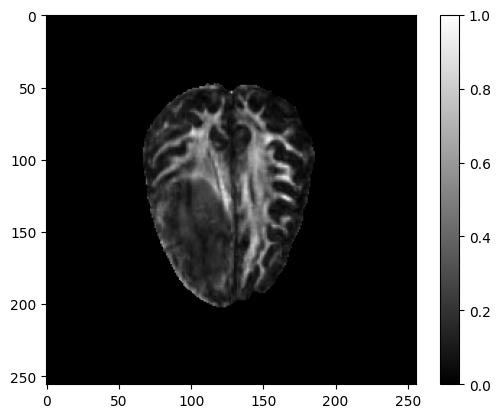

In [12]:
import os

vmin = 0
vmax = 1

bimodal_codes = ['T1-T2', 'T1-T1GD', 'T1-FLAIR', 'T2-T1GD', 'T2-FLAIR', 'T1GD-FLAIR']
bimodal_gens_CL = [T1_T2_CL, T1_T1GD_CL, T1_FLAIR_CL, T2_T1GD_CL, T2_FLAIR_CL, T1GD_FLAIR_CL]
bimodal_gens_noCL = [T1_T2_noCL, T1_T1GD_noCL, T1_FLAIR_noCL, T2_T1GD_noCL, T2_FLAIR_noCL, T1GD_FLAIR_noCL]
bimodal_metrics_CL = []
bimodal_metrics_noCL = []

# os.mkdir('bimodal')

example_input, example_target = next(iter(test_ds[0].take(2))), next(iter(test_ds[1].take(2)))

# Take example input and target image
for code, gen in zip(bimodal_codes, bimodal_gens_CL):
    processed_input, processed_target = prepare_data(code, example_input, example_target)
    generated = gen(processed_input)
    ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
    bimodal_metrics_CL.append([ssim, psnr])
    # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave(f'bimodal/{code + "CL"}.png', tf.squeeze(generated*0.5+0.5).numpy(), cmap='gray')
    plt.pause(1)
    
for code, gen in zip(bimodal_codes, bimodal_gens_noCL):
    processed_input, processed_target = prepare_data(code, example_input, example_target)
    generated = gen(processed_input)
    ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
    bimodal_metrics_noCL.append([ssim, psnr])
    # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave(f'bimodal/{code + "noCL"}.png', tf.squeeze(generated*0.5+0.5).numpy(), cmap='gray')
    plt.pause(1)
    
plt.imshow(tf.squeeze(processed_target*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.savefig(f'bimodal/real_target.png')

bimodal_metrics_CL, bimodal_metrics_noCL

In [16]:
T1_T2_T1GD_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T2-T1GD/06062023_05:12:42/gen.h5')
T1_T2_FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T2-FLAIR/06062023_05:34:00/gen.h5')
T1_T1GD_FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T1GD-FLAIR/06062023_05:55:38/gen.h5')
T2_T1GD_FLAIR_CL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2-T1GD-FLAIR/06062023_06:16:26/gen.h5')

T1_T2_T1GD_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T2-T1GD/06062023_00:03:21/gen.h5')
T1_T2_FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T2-FLAIR/06062023_00:26:21/gen.h5')
T1_T1GD_FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T1-T1GD-FLAIR/06062023_00:49:05/gen.h5')
T2_T1GD_FLAIR_noCL = tf.keras.models.load_model('/Users/ayoushsrivastava/Desktop/code/results/pix2pix/T2-T1GD-FLAIR/06062023_01:13:21/gen.h5')

([[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8755246], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.733757], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.86861396], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.156342], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.85748786], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.452538], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8713952], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([24.948307], dtype=float32)>]],
 [[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8532707], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.863184], dtype=float32)>],
  [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.87194383], dtype=float32)>,
   <tf.Tensor: shape=(1,), dtype=float32, numpy=array([25.176825], 

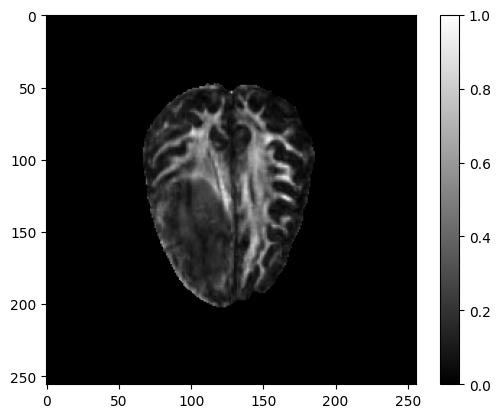

In [17]:
import os

vmin = 0
vmax = 1

trimodal_codes = ['T1-T2-T1GD', 'T1-T2-FLAIR', 'T1-T1GD-FLAIR', 'T2-T1GD-FLAIR']
trimodal_gens_CL = [T1_T2_T1GD_CL, T1_T2_FLAIR_CL, T1_T1GD_FLAIR_CL, T2_T1GD_FLAIR_CL]
trimodal_gens_noCL = [T1_T2_T1GD_noCL, T1_T2_FLAIR_noCL, T1_T1GD_FLAIR_noCL, T2_T1GD_FLAIR_noCL]
trimodal_metrics_CL = []
trimodal_metrics_noCL = []

# os.mkdir('trimodal')

example_input, example_target = next(iter(test_ds[0].take(2))), next(iter(test_ds[1].take(2)))

# Take example input and target image
for code, gen in zip(trimodal_codes, trimodal_gens_CL):
    processed_input, processed_target = prepare_data(code, example_input, example_target)
    generated = gen(processed_input)
    ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
    trimodal_metrics_CL.append([ssim, psnr])
    # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave(f'trimodal/{code + "CL"}.png', tf.squeeze(generated*0.5+0.5).numpy(), cmap='gray')
    plt.pause(1)
    
for code, gen in zip(trimodal_codes, trimodal_gens_noCL):
    processed_input, processed_target = prepare_data(code, example_input, example_target)
    generated = gen(processed_input)
    ssim, psnr = calculate_metrics(processed_target*0.5+0.5, generated*0.5+0.5)
    trimodal_metrics_noCL.append([ssim, psnr])
    # plt.imshow(tf.squeeze(generated*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave(f'trimodal/{code + "noCL"}.png', tf.squeeze(generated*0.5+0.5).numpy(), cmap='gray')
    plt.pause(1)
    
plt.imshow(tf.squeeze(processed_target*0.5+0.5), cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.savefig(f'trimodal/real_target.png')

trimodal_metrics_CL, trimodal_metrics_noCL

In [ ]:
count = 0
train_ds_len = 0
for img_idx, train_image_set in enumerate((tf.data.Dataset.zip((train_ds[0], train_ds[1])))):
    if count % 2 == 0:
        train_ds_len += 1
    count += 1
        
train_ds_len

In [ ]:
count = 0
test_ds_len = 0
for img_idx, test_image_set in enumerate((tf.data.Dataset.zip((test_ds[0], test_ds[1])))):
    if count % 2 == 0:
        test_ds_len += 1
    count += 1
        
test_ds_len

In [ ]:
# Load model
model_path = '/home/paperspace/Documents/code/results/pix2pix/all/06052023_18:11:18/gen.h5'
gen = tf.keras.models.load_model(model_path)
gen.summary()

In [ ]:
# Apply trained models on test dataset to calculate mean metrics
tf.print(f"Testing model performance on test dataset...")
metrics_names = ['SSIM', 'PSNR', 'RSME', 'MAE']
metrics = {'SSIM': [], 
        'PSNR': [], 
        'RSME': [], 
        'MAE': [],
        }

count = 1
for img_idx, test_image_set in enumerate((tf.data.Dataset.zip((test_ds[0], test_ds[1])))):
    if count % 2 == 0:
        fake_image_y = gen(test_image_set[0])
        print(fake_image_y)
        calculated_metrics = calculate_metrics(tf.squeeze(fake_image_y, axis=0)[:,:,0], tf.squeeze(test_image_set[1], axis=0)[:,:,0])
        print(calculated_metrics)
        
        for metric_idx, metric in enumerate(calculated_metrics):
            print(metric)
            metrics[metrics_names[metric_idx]].append(metric)

    count += 1

for metric in metrics_names:   
    mean_metric = np.mean(np.asarray(metrics[metric]))
    std_metric = np.std(np.asarray(metrics[metric]))
    tf.print(f"The mean {metric} is: {mean_metric:2f} +- {std_metric:2f}.")

In [ ]:
import numpy as np
from scipy import linalg
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input

def calculate_fid(real_images, generated_images, batch_size=32):
    
    # Load InceptionV3 model without top classification layer
    inception_model = InceptionV3(include_top=False, pooling='avg')

    # Calculate activations for real and generated images
    real_activations = inception_model.predict(real_images, batch_size=batch_size)
    generated_activations = inception_model.predict(generated_images, batch_size=batch_size)

    # Calculate mean and covariance of real and generated activations
    mu_real = np.mean(real_activations, axis=0)
    mu_generated = np.mean(generated_activations, axis=0)
    sigma_real = np.cov(real_activations, rowvar=False)
    sigma_generated = np.cov(generated_activations, rowvar=False)

    # Calculate squared Frobenius norm between means
    mean_diff = mu_real - mu_generated
    mean_squared_norm = np.sum(mean_diff**2)

    # Calculate trace of the product of covariances
    cov_product = linalg.sqrtm(sigma_real.dot(sigma_generated))
    if np.iscomplexobj(cov_product):
        cov_product = cov_product.real

    # Calculate FID
    fid = mean_squared_norm + np.trace(sigma_real + sigma_generated - 2 * cov_product)

    return fid

In [ ]:
mean_FID = 0

for idx, test_image in enumerate(tf.data.Dataset.zip((test_ds[0], test_ds[1]))):
    FID = calculate_fid
    mean_FID += FID
    
mean_FID = mean_FID/idx